In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
aa = pd.read_hdf('results/noise_type_exp_res_06_27_12.h5')
bb = pd.read_hdf('results/noise_type_exp_res_08_13_53.h5')
df = pd.concat((aa, bb))
df.reset_index()
print("Done reading")

Done reading


In [5]:
df.columns

Index([u't_len', u'dims', u'n_classes', u'approach', u'accuracy', u'ad_mean',
       u'ad_std', u'gd_mean', u'gd_std', u'conf_mean', u'conf_std',
       u'noise type'],
      dtype='object')

In [9]:
df['n_classes'].unique()

array([10])

In [6]:
df['noise type'].unique()

array(['add_rand_noise', 'shot_noise', 'offset', 'low_filt', 'whitenoise'], dtype=object)

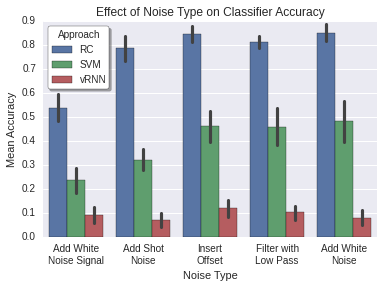

In [8]:
ff = sns.barplot(x="noise type", y="accuracy", hue="approach", data=df)
ff.set_xlabel("Noise Type")
ff.set_ylabel("Mean Accuracy")
ff.set_title("Effect of Noise Type on Classifier Accuracy")
ff.set_xticklabels(
    ["Add White\nNoise Signal", "Add Shot\nNoise", "Insert\nOffset", "Filter with\nLow Pass", "Add White\nNoise"]
)
leg = ff.legend(title="Approach", frameon=True, fancybox=True, shadow=True, framealpha=1, loc="upper left")
fl = leg.get_frame()
fl.set_facecolor('white')
fl.set_edgecolor('black')

fig = ff.get_figure()
fig.subplots_adjust(bottom=0.15)
fig.savefig("noise_type.pdf", format="pdf")

In [100]:
type(ff)

matplotlib.axes.AxesSubplot

Interesting to note that the loss of high-frequency information had almost no effect on the SVM classifier.
Also interesting that shot noise was more harmful to the vRNN than to SNN methods.
Not surprising that additive white noise had the greatest effect on accuracy for all classification methods.

In [43]:
mf1 = pd.read_hdf('results/whitenoise_mag_exp_res_11_03_42.h5')
mf2 = pd.read_hdf('results/whitenoise_mag_exp_res_10_35_19.h5')
mf = pd.concat((mf1, mf2))

In [65]:
mf.columns
mf_filt = mf[mf['noise magnitude'] < 0.15]

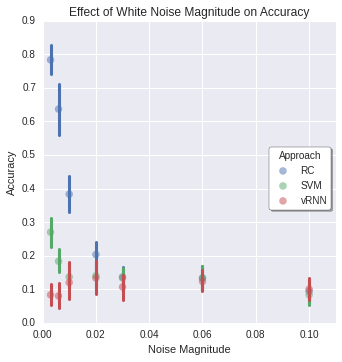

In [91]:
ff = sns.lmplot("noise magnitude", "accuracy", hue="approach", data=mf_filt, x_estimator=np.mean,
                scatter_kws={"alpha": 0.5}, fit_reg=False, legend=False)

ax = ff.axes[0][0]
ax.set_title("Effect of White Noise Magnitude on Accuracy")
ax.set_xlabel("Noise Magnitude")
ax.set_ylabel("Accuracy")
leg = ax.legend(title="Approach", bbox_to_anchor=(1, 0.6), frameon=True, fancybox=True, shadow=True, framealpha=1)
fl = leg.get_frame()
fl.set_facecolor('white')
fl.set_edgecolor('black')
ax.set_xlim((0.0, 0.11))

ff.fig.savefig("noise_mag.pdf", format="pdf")